**Problem 0**

Run the cell below to make sure you are in the data1030 coding environment. 

We will deduct 2 points for every missing OK sign. (If you don't run the cell, that's -14 points.)


In [1]:
from __future__ import print_function
from packaging.version import parse as Version
from platform import python_version

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.10 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(python_version())

if pyversion >= Version("3.10"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.10"):
    print(FAIL, "Python version 3.10 is required,"
                " but %s is installed." % pyversion)
else:
    print(FAIL, "Unknown Python version: %s" % pyversion)

    
print()
requirements = {'numpy': "1.22.4", 'matplotlib': "3.5.2",'sklearn': "1.1.1", 
                'pandas': "1.4.2",'xgboost': "1.5.1", 'shap': "0.40.0"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[FAIL] Python version 3.10 is required, but 3.9.7 is installed.

[FAIL] numpy version 1.22.4 is required, but 1.20.3 installed.
[FAIL] matplotlib version 3.5.2 is required, but 3.4.3 installed.
[FAIL] sklearn version 1.1.1 is required, but 0.24.2 installed.
[FAIL] pandas version 1.4.2 is required, but 1.3.4 installed.
[FAIL] xgboost not installed. 
[FAIL] shap not installed. 


**Problem 1a, diabetes EDA** (10 points)

We will work with the diabetes dataset in problem 1. Please carefully read the description [here](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html) and [here](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset). Read the data into a pandas dataframe using the txt file linked [here](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt). Perform EDA by going through Q1-4 from PS3 2a. Prepare two additional visualizations using column pairs. The two figures should be different types but one of the columns should be the target variable on both.

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
df=pd.read_table('diabetes.txt')
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [3]:
#find the shape of the df
print(df.shape)

(442, 11)


In [4]:
#see the type of data you have
pd.options.display.max_rows = 1000
pd.options.display.width = 1000
df.dtypes.tolist

<bound method IndexOpsMixin.tolist of AGE      int64
SEX      int64
BMI    float64
BP     float64
S1       int64
S2     float64
S3     float64
S4     float64
S5     float64
S6       int64
Y        int64
dtype: object>

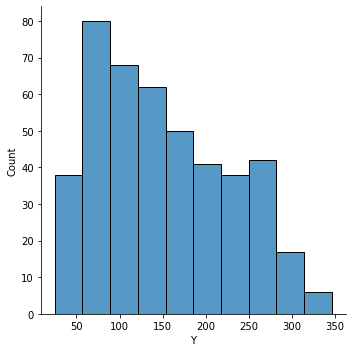

In [5]:
df['Y'].describe
sns.displot(df, x="Y")
df=df.rename(columns={"Y": "DiaProg"})

In [6]:
df.head()


,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,DiaProg
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [7]:
y = df['DiaProg'] # target variable is the diagnosis progression
X = df.loc[:, df.columns != 'DiaProg'] # all other columns are features
y.head()
X.head()


,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


**Problem 1b, basic split** (10 points)

Write a general function that perform basic splitting and tests both the input and the output. Let's call the function basic_split. It takes a feature matrix (X), a target variable (y), train_size, val_size, test_size, and random_state as inputs. The output is X_train, y_train, X_val, y_val, X_test, y_test. 

Perform the following tests inside the function and raise a value error with a message if one or more of the tests fail.

Test the inputs:
- the sum of train_size, val_size, test_size is 1
- random_state is an integer

Use train_test_split.

Test the outputs:
- check that the output sizes are what you want them to be

Note that in principle you could add more tests. For example:
- test if X is a 2d pandas data frame
- test if y is a 1d pandas series
- check if the number of rows in X is the same as the length of y

These tests are included in train_test_split, that's why we don't need to add them to the code. However, if you were to split your data manually without train_test_split, it would be good to add these additional tests and potentially more.

Apply the function to the diabetes dataset with train_size = 0.6, val_size = 0.2, and test_size = 0.2. Print out the head of X_train, X_val, and X_test. Make sure that you get the same points in each set every time you rerun the cell (a.k.a., check for reproducability).

This function is general purpose, you'll be able to reuse it in any project if you want to perform basic split on your data.

In [8]:
from sklearn.model_selection import train_test_split 

def basic_split(X,y,train_size,val_size,test_size,random_state):
    
    # test the inputs
    print((train_size+val_size+test_size))
    
    
    # perform basic split
    X_train, X_other, y_train, y_other = train_test_split(X,y,\
    train_size = train_size,random_state = random_state)#first split to separate out training data
    
    val_adj=train_size/(1-val_size)
    print(val_adj)
    
    X_val, X_test, y_val, y_test=train_test_split(X_other,y_other,\
    train_size=val_adj,random_state=random_state) #second split to separate validation and test data
    
    
    # test the outputs
    print('training set:',X_train.shape, y_train.shape) # 60% of points are in train
    print('validation set:',X_val.shape, y_val.shape) # 20% of points are in validation
    print('test set:',X_test.shape, y_test.shape) # 20% of points are in test

    
    return X_train, y_train, X_val, y_val, X_test, y_test


basic_split(X, y, 0.6, 0.2, 0.2, 42)




1.0
0.7499999999999999
training set: (265, 10) (265,)
validation set: (132, 10) (132,)
test set: (45, 10) (45,)


(     AGE  SEX   BMI      BP   S1     S2    S3    S4      S5   S6
 249   45    1  32.0  110.00  224  134.2  45.0  5.00  5.4116   93
 250   67    1  31.6  116.00  179   90.4  41.0  4.00  5.4723  100
 59    66    2  24.0   98.00  236  146.4  58.0  4.00  5.0626   96
 111   54    1  26.8   87.00  206  122.0  68.0  3.00  4.3820   80
 204   79    2  27.0  103.00  169  110.8  37.0  5.00  4.6634  110
 410   46    2  23.8   97.00  224  139.2  42.0  5.00  5.3660   81
 6     36    2  22.0   90.00  160   99.6  50.0  3.00  3.9512   82
 397   63    1  26.0   85.67  155   78.2  46.0  3.37  5.0370   97
 305   46    2  22.7   83.00  183  125.8  32.0  6.00  4.8363   75
 158   45    1  20.3   74.33  190  126.2  49.0  3.88  4.3041   79
 150   55    1  32.9  102.00  164  106.2  41.0  4.00  4.4308   89
 177   62    1  28.9   87.33  206  127.2  33.0  6.24  5.4337   99
 184   53    1  28.6   88.00  171   98.8  41.0  4.00  5.0499   99
 10    22    1  18.6   97.00  114   57.6  46.0  2.00  3.9512   83
 417   34 

**Problem 1c, stratified regression** (5 points)

I mentioned in class that sklearn's splitting methods can only stratify with respect to a classification target variable. However you might encounter scenarios where it is necessary to stratify on a regression target variable. For example, it is a good idea to stratify, if the distribution of the regression target variable is heavy-tailed (e.g., exponential, log-normal). If you do not stratify, some of your sets might not contain rare values from the heavy tail thus throwing off the regression model.

Either come up with an algorithm to stratify with respect to a regression target variable, write [pseudocode](https://en.wikipedia.org/wiki/Pseudocode) in a markdown cell below to explain the steps of the alrogithm; or do some reading online and write a paragraph or two to explain already existing algorithms/approaches to solve the problem and add your references.

In [9]:
len(y)
# Create the bins.  My `y` variable has
# 442 observations, and I want 30 bins.

#bins = np.linspace(0, 442, 30)

# Save Y values in a new ndarray,
# broken down by the bins created above.

#y_binned = np.digitize(y, bins)

# Pass y_binned to the stratify argument,
# and let sklearn will handle the rest

#X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, stratify=y_binned)


442

**Problem 2** 

We work with the [hand postures dataset](https://archive.ics.uci.edu/ml/datasets/Motion+Capture+Hand+Postures) in problem 2. Please carefully read the dataset description and perform as much EDA as you can on this dataset. The EDA is not graded but it will help you to correctly answer 2a and 2b.

This dataset has group structure. 14 users performing 5 hand postures with markers attached to a left-handed glove were recorded. Two different ML questions can be asked using this dataset. We will explore how splitting differs for both questions in 2a and 2b.

In [10]:

df=pd.read_csv('Postures.csv', na_values='?') # converts the ? into Nan
df.head()

pd.set_option('display.max_columns', None)

df=df.drop(0)
df.head()

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,X4,Y4,Z4,X5,Y5,Z5,X6,Y6,Z6,X7,Y7,Z7,X8,Y8,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,-52.919272,85.232264,67.749220,-73.684130,59.188576,10.678936,-71.297781,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,-69.982489,87.450873,68.400808,-70.703991,61.587452,11.779919,-68.827418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,-70.658489,86.835388,68.907925,-71.138344,61.686427,11.793440,-68.889316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,-72.228461,61.596157,11.250648,-68.956425,77.387225,42.717833,-72.015146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,0,55.142401,71.435607,-64.177303,36.175818,81.556874,-53.475747,76.986143,42.426849,-72.574743,86.368748,67.901260,-72.444650,61.275402,10.841109,-69.279906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.isnull().sum()

Class        0
User         0
X0           0
Y0           0
Z0           0
X1           0
Y1           0
Z1           0
X2           0
Y2           0
Z2           0
X3         690
Y3         690
Z3         690
X4        3120
Y4        3120
Z4        3120
X5       13023
Y5       13023
Z5       13023
X6       25848
Y6       25848
Z6       25848
X7       39152
Y7       39152
Z7       39152
X8       47532
Y8       47532
Z8       47532
X9       54128
Y9       54128
Z9       54128
X10      63343
Y10      63343
Z10      63343
X11      78064
Y11      78064
Z11      78064
dtype: int64

In [12]:
#only use histogram for continuous
#value count for categorical data

In [13]:
#value count for user
df['User'].value_counts()

10    9573
0     9048
13    8739
11    8061
14    7495
8     6811
5     5105
12    4865
1     4717
2     4513
6     4377
9     3920
7      492
4      379
Name: User, dtype: int64

In [14]:
#value count for class
df['Class'].value_counts()

3    16344
1    16265
5    15733
2    14978
4    14775
Name: Class, dtype: int64

In [15]:
corrMatrix = df.corr()
#checking corr for class 
corrMatrix["Class"].sort_values(ascending=False)
#checking correlation for user target variable
#corrMatrix["User"].sort_values(ascending=False)


Class    1.000000
Y9       0.232564
Y10      0.172429
Y3       0.169591
Y2       0.169251
Y8       0.167639
Y4       0.167531
Y1       0.144086
Y5       0.119372
Z2       0.095538
Z1       0.089920
Z3       0.081781
Y0       0.081755
X0       0.080171
Y7       0.062849
Y6       0.062182
X10      0.053305
Z0       0.051857
Z4       0.050899
X1      -0.010569
Z5      -0.027581
User    -0.030714
Z10     -0.048026
X6      -0.051941
X2      -0.052392
X5      -0.052505
X4      -0.055829
X3      -0.056177
Z9      -0.075394
X9      -0.086485
X7      -0.106844
X8      -0.119390
Z8      -0.119719
Z6      -0.157333
Z7      -0.248762
X11           NaN
Y11           NaN
Z11           NaN
Name: Class, dtype: float64

**Problem 2a** (10 points)

How would you split the dataset if we wanted to know how accurately we can predict the hand postures of a new, previously unseen user? What's the target variable? What's the group label? Write down your reasoning (the usual 1-2 paragraphs are fine). Split the dataset into training, validation, and test sets. As usual, check for reproducability!

Add your explanation here:



In [16]:
#The target variable is class. This means what time of hand gesture the user chose.
#I picked groupkfold because the sample size is small. I made sure to turn on shuffle because the groups could be ordered in a way that the kfold could completely miss out on certain groups.
# add your code here
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import GroupShuffleSplit
random_state=69

X=df.drop(['Class','User'], axis=1)
groups = df['User'] 
y = df['Class']

group_kfold=GroupKFold(n_splits=5)

#do a basic split to take out the test and valid group. The test and validation groups are smaller so we want to kfold split.
X_other, X_test,y_other,y_test=train_test_split(X,y,test_size = 0.2,random_state=random_state)
print(X_other.shape,y_other.shape)
print('test set:',X_test.shape,y_test.shape)

#perform k-fold split on the other
kf = KFold(n_splits=5,shuffle=True,random_state=random_state)
for train_index, val_index in kf.split(X_other,y_other): #splits the data into n groups. The validation data set changes for each group. Each fold will have a validation score. Take the average of the scores for performance score.
    X_train = X_other.iloc[train_index]
    y_train = y_other.iloc[train_index]
    X_val = X_other.iloc[val_index]
    y_val = y_other.iloc[val_index]
    print('   training set:',X_train.shape, y_train.shape) 
    print('   validation set:',X_val.shape, y_val.shape) #check that there is the same amount of data between the groups
    print(X_val.head())
    

print(X_val.head())

    
    
    




(62476, 36) (62476,)
test set: (15619, 36) (15619,)
   training set: (49980, 36) (49980,)
   validation set: (12496, 36) (12496,)
              X0          Y0         Z0         X1          Y1         Z1         X2          Y2         Z2          X3         Y3         Z3         X4          Y4         Z4          X5          Y5         Z5         X6          Y6         Z6         X7         Y7         Z7         X8          Y8         Z8         X9          Y9         Z9        X10         Y10        Z10  X11  Y11  Z11
51591  21.473002   97.994416  -1.314292  61.965286  147.509517  -0.964240  81.852071  132.185775 -14.558444  107.419498  50.030787 -41.911526  36.998910  143.607473   6.388884   72.294564   10.218487 -49.246806   4.863097  130.513690   2.916864  71.369292  95.430973 -10.609245  -4.973078   92.435972  -0.321082  87.857128   33.500202 -46.864998  44.402618  102.026271  -4.310457  NaN  NaN  NaN
46460  62.466092   86.356622 -27.850928  42.429844  150.068063 -22.370153  85.18

**Problem 2b** (10 points)

How would you split the data if we wanted to identify a user based on their hand postures? What's the target variable? What's the group label? Follow the same steps as in 2a (explain your reasoning, split, check reproducability).

Add your explanation here:


In [17]:
#we would be trying to target the user variable. I will perform a stratified split because the number of users around 3 is very low.
#I performed EDA and noticed some classes had extremely small samples size. The target variable 4 and 7 had small data set.
# add you code here
from sklearn.model_selection import StratifiedKFold
X=df.drop(['Class','User'], axis=1)
y=df['User']
kf = KFold(n_splits=4,shuffle=True,random_state=random_state)
for train_index, val_index in kf.split(X_other,y_other):
    print('new fold')
    X_train = X_other.iloc[train_index]
    y_train = y_other.iloc[train_index]
    X_val = X_other.iloc[val_index]
    y_val = y_other.iloc[val_index]
    print(np.unique(y_train,return_counts=True))
    print(np.unique(y_val,return_counts=True))







new fold
(array([1, 2, 3, 4, 5]), array([9707, 8920, 9948, 8823, 9459]))
(array([1, 2, 3, 4, 5]), array([3309, 3025, 3168, 2989, 3128]))
new fold
(array([1, 2, 3, 4, 5]), array([9789, 8976, 9815, 8852, 9425]))
(array([1, 2, 3, 4, 5]), array([3227, 2969, 3301, 2960, 3162]))
new fold
(array([1, 2, 3, 4, 5]), array([9731, 8982, 9806, 8932, 9406]))
(array([1, 2, 3, 4, 5]), array([3285, 2963, 3310, 2880, 3181]))
new fold
(array([1, 2, 3, 4, 5]), array([9821, 8957, 9779, 8829, 9471]))
(array([1, 2, 3, 4, 5]), array([3195, 2988, 3337, 2983, 3116]))
